# Proyek Analisis Data: [Bike sharing dataset (hour.csv daily.csv)]
- **Nama:** [Davino Edric Faturrahman]
- **Email:** [vinoedric@gmail.com]
- **ID Dicoding:** [davino_edric_faturrahman_b6RF]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Pertanyaan 1: Apakah perbedaan musim mempengaruhi pola penggunaan / penyewaan sepeda? jika iya, maka musim manakah yang dapat menarik penyewa lebih banyak dan mengapa (time bound, specific, dan juga logis)
- Pertanyaan 2: (Tidak bergantung pada pertanyaan 1) Apakah cuaca memiliki dampak terhadap penyewaan sepeda? Jika iya, maka cuaca apakah yang memiliki penyewa lebih banyak, dan mengapa? (Time bound, specific, dan juga logis)

saya sengaja memilih pertanyaan yang mudah dijawab dan (berkemungkinan besar) dapat dianalisis dengan gampang menggunakan data yang berada di dalam file csv

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [ ]:
# Membaca dataset
day_data = pd.read_csv('./day.csv')
hour_data = pd.read_csv('./hour.csv')



### Assessing Data

In [ ]:
# Melihatkan sedikit data dari file daily
print("Daily Data Sample:")
day_data.head()


Daily Data Sample:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Melihatkan sedikit data dari file hourly
print("Hourly Data Sample:")
hour_data.head()

Hourly Data Sample:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Setelah melihat head dari dua file csv, saya mencoba mencari info dua file

In [ ]:
# Memeriksa tipe data dan missing values untuk kedua dataset
print("Info Data Harian:")
print(day_data.info())

print("Info Data Per Jam:")
print(hour_data.info())


Info Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Info Data Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

In [ ]:
# Berikut merupakan perubahan yg saya buat berdasarkan feedback dari hasil kelulusan (tidak lulus)


# **Mengecek duplikat data
print("\nJumlah duplikat pada data harian:", day_data.duplicated().sum())
print("Jumlah duplikat pada data per jam:", hour_data.duplicated().sum())

# 2. Mencari inconsistent Value
print("\nUnique values in 'season' (daily data):", day_data['season'].unique())
print("Unique values in 'weathersit' (daily data):", day_data['weathersit'].unique())
print("Unique values in 'season' (hourly data):", hour_data['season'].unique())
print("Unique values in 'weathersit' (hourly data):", hour_data['weathersit'].unique())

# Mengecek outlier dari kategori numerik menggunakan describe()
print("\nStatistik deskriptif data harian:")
print(day_data[['temp', 'hum', 'windspeed', 'cnt']].describe())

print("\nStatistik deskriptif data per jam:")
print(hour_data[['temp', 'hum', 'windspeed', 'cnt']].describe())


Jumlah duplikat pada data harian: 0
Jumlah duplikat pada data per jam: 0

Unique values in 'season' (daily data): [1 2 3 4]
Unique values in 'weathersit' (daily data): [2 1 3]
Unique values in 'season' (hourly data): [1 2 3 4]
Unique values in 'weathersit' (hourly data): [1 2 3 4]

Statistik deskriptif data harian:
             temp         hum   windspeed          cnt
count  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.627894    0.190486  4504.348837
std      0.183051    0.142429    0.077498  1937.211452
min      0.059130    0.000000    0.022392    22.000000
25%      0.337083    0.520000    0.134950  3152.000000
50%      0.498333    0.626667    0.180975  4548.000000
75%      0.655417    0.730209    0.233214  5956.000000
max      0.861667    0.972500    0.507463  8714.000000

Statistik deskriptif data per jam:
               temp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.

**Insight:**
- Kedua file csv memiliki data yg relevan untuk pertanyaan bisnis (saya membaca data terlebih dahulu baru mengusulkan pertanyaan bisnis)
- Nampaknya tidak ada missing data yang ada, namun untuk berjaga2 saya mencoba melakukan drop duplicate serta memastikan tipe data

### Cleaning Data

In [ ]:
# Mengganti tipe data pada kolom dteday menjadi datetime (yang seharusnya sesuai)
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Menghapus duplikat
day_data = day_data.drop_duplicates()
hour_data = hour_data.drop_duplicates()

# Menampilkan info data yang telah dibersihkan
print("Data Harian Setelah Dibersihkan:")
day_data.info()
day_data.head()

Data Harian Setelah Dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64        

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Menghapus nilai yang tidak konsisten pada kolom kategori
valid_season_values = [1, 2, 3, 4]
valid_weathersit_values = [1, 2, 3, 4]

# Membersihkan data harian
day_data = day_data[day_data['season'].isin(valid_season_values)]
day_data = day_data[day_data['weathersit'].isin(valid_weathersit_values)]

# Membersihkan data per jam
hour_data = hour_data[hour_data['season'].isin(valid_season_values)]
hour_data = hour_data[hour_data['weathersit'].isin(valid_weathersit_values)]

In [ ]:
# Membersihkan outlier dari kolom numerik dengan IQR (Interquartile Range)
numeric_columns = ['temp', 'hum', 'windspeed', 'cnt']

def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

day_data = remove_outliers(day_data, numeric_columns)
hour_data = remove_outliers(hour_data, numeric_columns)

In [ ]:
# Menampilkan info data yang telah dibersihkan
print("Data Harian Setelah Dibersihkan:")
day_data.info()
day_data.head()

print("Info Data Per Jam Setelah Dibersihkan:")
hour_data.info()
hour_data.head()


Data Harian Setelah Dibersihkan:
<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     717 non-null    int64         
 1   dteday      717 non-null    datetime64[ns]
 2   season      717 non-null    int64         
 3   yr          717 non-null    int64         
 4   mnth        717 non-null    int64         
 5   holiday     717 non-null    int64         
 6   weekday     717 non-null    int64         
 7   workingday  717 non-null    int64         
 8   weathersit  717 non-null    int64         
 9   temp        717 non-null    float64       
 10  atemp       717 non-null    float64       
 11  hum         717 non-null    float64       
 12  windspeed   717 non-null    float64       
 13  casual      717 non-null    int64         
 14  registered  717 non-null    int64         
 15  cnt         717 non-null    int64         
dty

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data sudah bersih dari nilai yang hilang dan duplikat.
- Kolom dteday memiliki tipe data yang salah, maka saya ubah menjadi tipe data datetime.

**Dari Feedback:**
- Data sudah bersih dari outlier dan inconsistent value.
- Menghapus Inconsistent Data dari data yang ada


## Exploratory Data Analysis (EDA)

### Explore ...

# Univariate Analysis

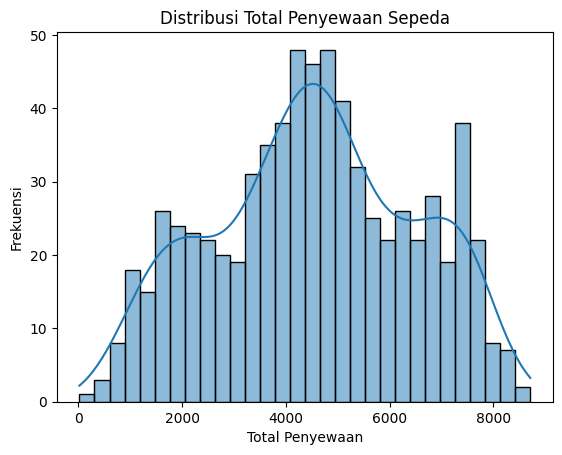

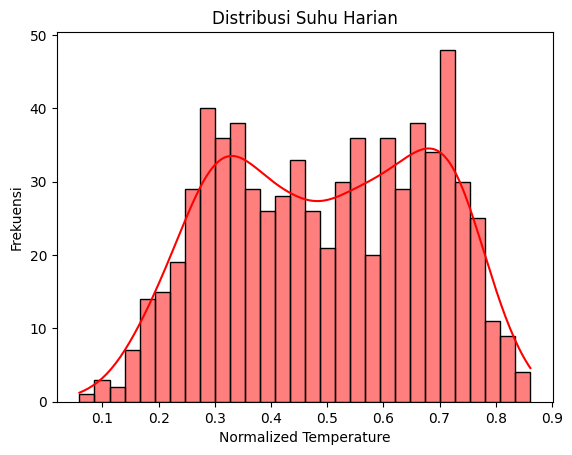

In [ ]:
# Distribusi univariat untuk total penyewaan sepeda
sns.histplot(day_data['cnt'], kde=True, bins=30)
plt.title("Distribusi Total Penyewaan Sepeda")
plt.xlabel("Total Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

# Distribusi suhu
sns.histplot(day_data['temp'], kde=True, bins=30, color='red')
plt.title("Distribusi Suhu Harian")
plt.xlabel("Normalized Temperature")
plt.ylabel("Frekuensi")
plt.show()

Penjelasan grafik:
- Grafik pertama menunjukkan berapa banyak sepeda yg disewa per bulan (Jumlah/Bln) di axis X dan di axis Y menunjukkan seberapa banyak hal itu terjadi (kalau bahasa kasarnya: Umumnya untuk tiap bulan, jumlah orang yang menyewa adalah ...)
- Grafik kedua menunjukkan suhu rata2 di daerah tersebut, ini memberikan insight terhadap pola suhu di daerah tersebut



# Categorical analysis

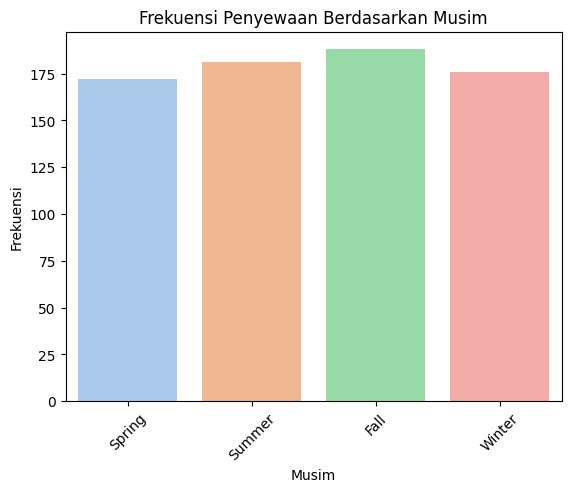

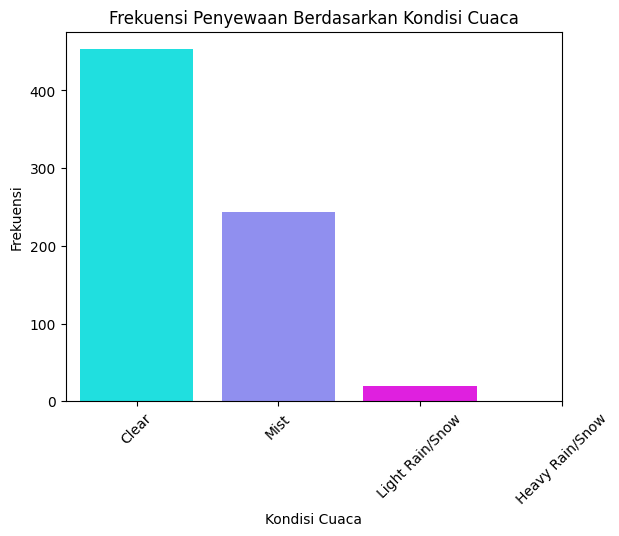

In [ ]:
# Jumlah penyewaan berdasarkan musim (categorical analysis)
sns.countplot(x='season', data=day_data, hue='season', palette='pastel', legend=False)
plt.title("Frekuensi Penyewaan Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Frekuensi")
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'], rotation=45)
plt.show()

# Jumlah penyewaan berdasarkan kondisi cuaca (categorical analysis)
sns.countplot(x='weathersit', data=day_data, hue='weathersit', palette='cool', legend=False)
plt.title("Frekuensi Penyewaan Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Frekuensi")
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=45)
plt.show()


**Penjelasan Grafik**

- Grafik pertama menunjukkan jumlah penyewaan sepeda berdasarkan musim, ini dapat memberi sedikit insight terhadap pola penyewwaan orang berdasarkan musim
- Grafik dua menunjukkan jumlah penyewaan sepeda berdasarkan cuaca, ini dapat memberi insight terhadap cuaca yang dapatt berpengaruh terhadap jumlah penyewaan sepeda


# Multivariate Analysis

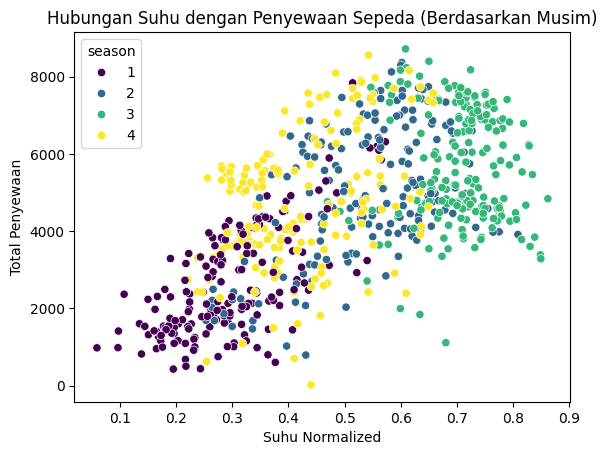

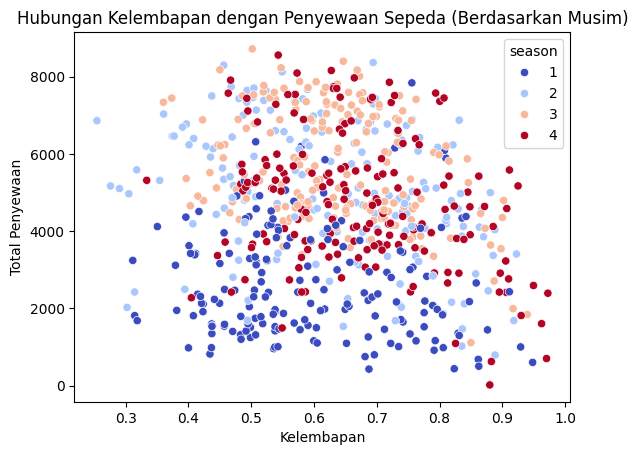

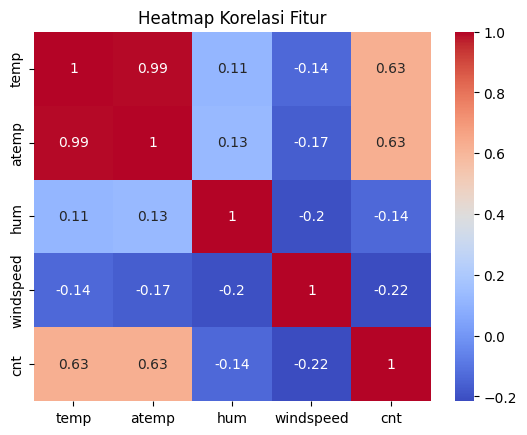

In [ ]:
# Hubungan antara suhu dan total penyewaan
sns.scatterplot(x='temp', y='cnt', data=day_data, hue='season', palette='viridis')
plt.title("Hubungan Suhu dengan Penyewaan Sepeda (Berdasarkan Musim)")
plt.xlabel("Suhu Normalized")
plt.ylabel("Total Penyewaan")
plt.show()

# Hubungan kelembapan dengan total penyewaan
sns.scatterplot(x='hum', y='cnt', data=day_data, hue='season', palette='coolwarm')
plt.title("Hubungan Kelembapan dengan Penyewaan Sepeda (Berdasarkan Musim)")
plt.xlabel("Kelembapan")
plt.ylabel("Total Penyewaan")
plt.show()

# Heatmap untuk melihat korelasi antar fitur numerik
corr = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

**Penjelasan Grafik**

- Grafik pertama menunjukkan scatterplot yang mendetailkan jumlah total penyewwaan di axis y berdasarkan suhu normal yang ada disekitar area (axis X). Warna pada tiap titik menunjukkan pada musim apa mereka menyeaw sepeda tersebut. Grafik ini memberi insight kepada 3 hal, mengenai total penyewaan berdasarkan musim, total penyewaan bedasarkan suhu, dan rincian
- Grafik kedua menunjukkan scatterplot yang mendetailkan jumlah penyewaan sepeda di axis y berdasrkan kelembapan di sumbu x, warna titik2 scatterplot berdasarkan musim. Ini memberi insight yang sama dengan grafik sebelumnya, namun ganti faktor suhu menjadi faktor kelembapan
- Grafik ketiga menunjukkan korelasi antara fitur fitur yang ada dalam file csv seperti temp atemp hum windspeed and cnt. Grafik ini berguna untuk memberi wawasan tentang variabel mana yang paling mempengaruhi penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Pertanyaan 1: Apakah perbedaan musim mempengaruhi pola penggunaan / penyewaan sepeda? jika iya, maka musim manakah yang dapat menarik penyewa lebih banyak dan mengapa (time bound, specific, dan juga logis)**

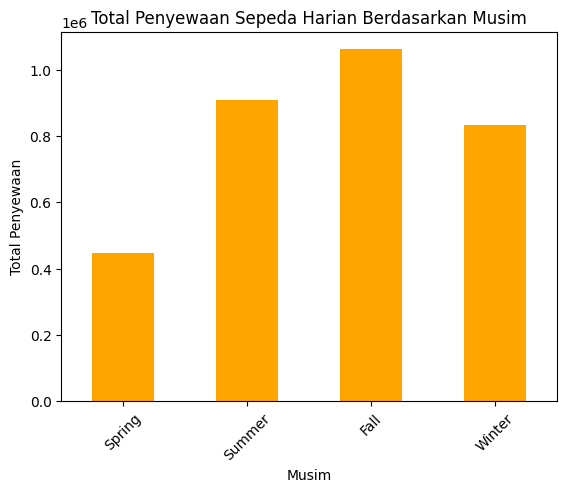

In [ ]:
# Memeriksa jumlah penyewaan berdasarkan musim (data harian)
seasonal_rentals = day_data.groupby('season')['cnt'].sum()

# Melakukan visualisasi dengan bar plot
seasonal_rentals.plot(kind='bar', color='orange')
plt.title('Total Penyewaan Sepeda Harian Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'], rotation=45)
plt.show()


- Dari sini kita dapat melihat bahwa iya, musim mempengaruhi berapa banyak sepeda yang digunakan / disewakan.
- Lebih tepatnya, di musim2 menjelang musim dingin (Fall / musim gugur memiliki hawa yang nyaman untuk bersepeda (harusnya))

### Pertanyaan 2:

**Pertanyaan 2: (Tidak bergantung pada pertanyaan 1) Apakah cuaca memiliki dampak terhadap penyewaan sepeda? Jika iya, maka cuaca apakah yang memiliki penyewa lebih banyak, dan mengapa? (Time bound, specific, dan juga logis)**

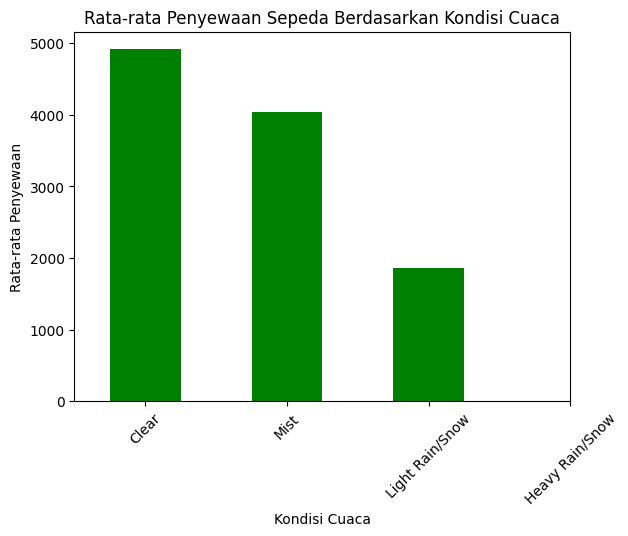

In [ ]:
# Kelompokkan berdasarkan kondisi cuaca dan plot rata-rata penyewaan untuk setiap kondisi
weather_rentals = day_data.groupby('weathersit')['cnt'].mean()

# Visualisasikan pengaruh cuaca terhadap penyewaan sepeda
weather_rentals.plot(kind='bar', color='green')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=45)
plt.show()



- Penyewaan sepeda memuncak ketika cuaca sedang cerah (masuk akalnya memang begitu)

**Insight:**
- Pertanyaan bisnis pertama telah terjawab, bahwa iya, musim memiliki dampak terhadap penyewaan sepeda
- Pertanyaan bisnis kedua juga sudah terjawab, bahwa cuaca (tidak terikat dengan perbedaan musim) pun juga memiliki dampak terhadap penyewaan sepeda

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Iya, musim memberi dampak terhadap jumlah penyewaan sepeda, dalam kasus ini, penyewa akan lebih cenderung menyewa pada musim di musim2 yang lebih sejuk seperti musim gugur maupun musim salju/dingin, untuk musim panas sendiri saya berpendapat bahwa itu dikarenakan banyaknya aktivitas outdoor yang terjadi di musim panas (mau itu berhubungan dengan menyewa sepeda maupun tidak), maka orang akan lebih tertarik utk menyewa sepeda karena banyak org yg juga melakukan aktivitas outdoor (FOMO)
- Conclution pertanyaan 2: Cuaca (terlepas dari musimnya) juga memberikan efek yang signifikan terhadap jumlah penyewaan. Penyewa akan lebih cenderung untuk menyewa sepeda ketika langit cerah dan tidak terlihat ada hujan, di kasus kedua adalah penyewa menyewa ketika mendung atau berkabut, penyewa masih banyak dijumpai dikarenakan mendung memberi udara yang cukup sejuh dan tidak terkena paans matahari. Kasus ketiga adalah hujan ringan (gerimis) maupun salju ringan, disini saya akan anggap bahwa banyak dari entri data ini direkam ketika musim dingin (siapakah yang mau bersepeda ketika hujan gerimis, apalagi menyewa sepedanya). Untuk kasus ke empat yaitu Heavy rain/ snow storm tidak perlu dijelaskan lebih lanjut, secara logika memang tidak masuk akal untuk menyewa sepeda dalam kasus tersebut

Aksi berikutnya untuk perusahaan:
- Melakukan marketing yang sesuai dengan musim dengan musim panas dan musim semi memiliki marketing mengenai aktivitas outdoor, sementara musim dingin dan gugur memiliki marketing berdasarkan hawa sejuk yang menyenangkan untuk bersepeda
- Pantau weather forecast untuk berita mengenai hujan berikutnya maupun mendung dan atau hujan deras berikutnya. Info ini dapat membuat perusahaan lebih baik melakukan planning dan budget management di hari-hari dimana uang tidak mengalir selancar jika hari tersebut hari yang cerah